<a href="https://colab.research.google.com/github/alfonsoayalapaloma/machine-learning/blob/main/ml_04_classifiers_logistic_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://pandas.pydata.org/static/img/pandas.svg" width="250">


## <center> Logistic Regression Classifier

# Solución de un problema de clasificación en Machine Learning



1.   Análisis del problema. Eleccion de un modelo.
2.   Extracción del dataset. Limpieza
1.   EDA. Analisis de la dataset
1.   Feature engineering [ determinar variables independientes(X) y dependiente(y)]
2.   Partir el dataset en train y test
2.   Crear el modelo y Entrenarlo
1.   Hacer predicciones
1.   Calificar el modelo
2.   Visualizar el resultado del modelo
1.   Conclusiones


# Problema de clasificación binaria en el dataset Titanic.

1. Análisis del problema


Usted es un ingeniero de Machine Learning y se le pide desarrollar un modelo que determine la supervivencia de un pasajero en el Titanic dada su edad  (Age) y el valor de su ticket (Fare).
Este es un problema de clasificacion y de aprendizaje supervisado, pues se tienen ejemplos marcados con labels supervicencia (survival).

Se puede utilizar un clasificador como SVC. Se usará la accuracy para calificar el modelo.

2. Extraccion del dataset. Limpieza

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


# Load the Titanic dataset
titanic = sns.load_dataset('titanic')
features=['pclass', 'sex', 'age', 'fare', 'embarked']

# Drop rows with missing values in 'age' and 'fare' columns to avoid issues with the model
df = titanic.dropna(subset=features)
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
441,0,3,male,20.0,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
781,1,1,female,17.0,1,0,57.0000,S,First,woman,False,B,Southampton,yes,False
852,0,3,female,9.0,1,1,15.2458,C,Third,child,False,NaN,Cherbourg,no,False


Encoding

In [ ]:
# Encode categorical features
df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Encode 'sex'
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Encode 'embarked'

<ipython-input-30-696584f3d9f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].map({'male': 0, 'female': 1})  # Encode 'sex'
<ipython-input-30-696584f3d9f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # Encode 'embarked'


In [ ]:
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
712,1,1,0,48.0,1,0,52.0000,2,First,man,True,C,Southampton,yes,False
370,1,1,0,25.0,1,0,55.4417,0,First,man,True,E,Cherbourg,yes,False
615,1,2,1,24.0,1,2,65.0000,2,Second,woman,False,NaN,Southampton,yes,False


3. EDA. Análisis del dataset

In [ ]:
target_col = 'survived'
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove(target_col)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(numeric_cols)
print(categorical_cols)


['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
['who', 'embark_town', 'alive']


4. Feature engineering [ determinar variables independientes(X) y dependiente(y)]

In [ ]:
target_names = df[target_col].unique()
features=['pclass', 'sex', 'age', 'fare', 'embarked']


# Prepare the features and target
X = df[features]
y = df[target_col]

5. Partir el dataset en train y test

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (569, 5)
X_test (143, 5)
y_train (569,)
y_test (143,)


6. Crear y Entrenar (Ajustar) el modelo.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

7. Hacer predicciones

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)


8. Calificar el modelo

In [ ]:
from sklearn.metrics import classification_report

#Convert to string
target_names = target_names.astype(str)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
report = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", report)

Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143



In [ ]:
# Optional: Coefficients of the logistic regression
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("\nCoefficients:\n", coefficients)


Coefficients:
     Feature  Coefficient
0    pclass    -1.338827
1       sex     2.499882
2       age    -0.030904
3      fare    -0.002657
4  embarked    -0.143630


Recuerde que:


*   Precision se usa cuando nos importa minimizar Falsos Positivos.
*   Recall se usa cuando nos importa minimizar Falsos Negativos.



### Comparación con un DummyClassifier


In [ ]:
### Comparacion con un DummyClassifier
from sklearn.dummy import DummyClassifier
dummy= DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print(dummy.score(X_test, y_test))

dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
print(f"Dummy Classifier Accuracy: {dummy_accuracy:.2f}")


0.5594405594405595
Dummy Classifier Accuracy: 0.56


9. Visualizar el resultado

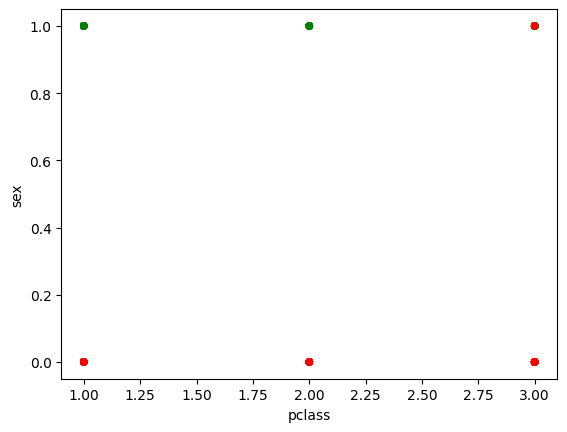

In [ ]:
combined_df =X_test.copy()
combined_df['y_pred'] = y_pred
combined_df['y_test'] = y_test

colors = {0:"red",1:"green"}
combined_df['colors'] = combined_df['y_pred'].map(colors)
combined_df.plot.scatter(x=features[0], y=features[1], color=combined_df['colors']);

10. Elaborar conclusiones

El modelo tiene una accuracy media por lo que se NO acepta como clasificador del dataset.

# EJERCICIO
Seleccione otras features adicionales buscando aumentar el accuracy del modelo. Compare contra un DummyClassifier


1. Análisis del problema. Elección de un modelo.

2. Extracción del dataset. Limpieza.

3. EDA Análisis del dataset

4. Feature engineering.  [ determinar variables independientes(X) y dependiente(y)]

5. partir el dataset en train y test

6. Crear el modelo y entrenarlo.

7. Hacer predicciones

8. Calificar el modelo

9. Visualizar el resultado del modelo

10. Conclusiones

# EJERCICIO

Realice el mismo ejercicio con el dataset de IRIS

